<a href="https://colab.research.google.com/github/Ankan-238/Covid_Data/blob/main/COVID_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset into a DataFrame
data = pd.read_csv('covid_tracking.csv')  # Replace 'your_dataset.csv' with the actual file name


In [2]:
data.head()

,date,state,positive,negative,pending,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,...,fips,death_increase,hospitalized_increase,negative_increase,positive_increase,total_test_results_increase,fips_code,iso_subdivision,load_time,iso_country
0,2021-03-07,AK,56886.0,NaN,NaN,33.0,1293.0,NaN,NaN,2.0,...,2,0,0,0,0.0,0,2,US-AK,2023-05-09 00:04:18,US
1,2021-03-07,AL,499819.0,1931711.0,NaN,494.0,45976.0,NaN,2676.0,NaN,...,1,-1,0,2087,408.0,2347,1,US-AL,2023-05-09 00:04:18,US
2,2021-03-07,AR,324818.0,2480716.0,NaN,335.0,14926.0,141.0,NaN,65.0,...,5,22,11,3267,165.0,3380,5,US-AR,2023-05-09 00:04:18,US
3,2021-03-07,AS,0.0,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,...,60,0,0,0,0.0,0,60,US-AS,2023-05-09 00:04:18,US
4,2021-03-07,AZ,826454.0,3073010.0,NaN,963.0,57907.0,273.0,NaN,143.0,...,4,5,44,13678,1335.0,45110,4,US-AZ,2023-05-09 00:04:18,US


In [3]:
data.shape

(22261, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22261 entries, 0 to 22260
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         22261 non-null  object 
 1   state                        22261 non-null  object 
 2   positive                     22066 non-null  float64
 3   negative                     14225 non-null  float64
 4   pending                      2479 non-null   float64
 5   hospitalized_currently       18584 non-null  float64
 6   hospitalized_cumulative      13084 non-null  float64
 7   in_icu_currently             12655 non-null  float64
 8   in_icu_cumulative            4126 non-null   float64
 9   on_ventilator_currently      10017 non-null  float64
 10  on_ventilator_cumulative     1290 non-null   float64
 11  recovered                    13164 non-null  float64
 12  data_quality_grade           0 non-null      float64
 13  last_update_et  

In [5]:
data.isna().sum()

date                               0
state                              0
positive                         195
negative                        8036
pending                        19782
hospitalized_currently          3677
hospitalized_cumulative         9177
in_icu_currently                9606
in_icu_cumulative              18135
on_ventilator_currently        12244
on_ventilator_cumulative       20971
recovered                       9097
data_quality_grade             22261
last_update_et                   653
hash                               0
date_checked                     653
death                           1067
hospitalized                    9177
total                              0
total_test_results               175
pos_neg                            0
fips                               0
death_increase                     0
hospitalized_increase              0
negative_increase                  0
positive_increase                 29
total_test_results_increase        0
f

Taking death as the target variable- we are doing the Time Series analysis and the related visualizations.

In [6]:
data['death']=data['death'].fillna(data['death'].mean())

In [7]:
# Convert the 'date' column to a datetime object
data['date'] = pd.to_datetime(data['date'])

In [8]:
# Set 'date' column as the DataFrame index
data.set_index('date', inplace=True)

In [9]:
# Select the columns relevant for time-series analysis (e.g., 'positive', 'hospitalized_currently', etc.)
columns_of_interest = ['death']
#negative','in_icu_currently','on_ventilator_currently','recovered','death','hospitalized','total_test_results_increase'

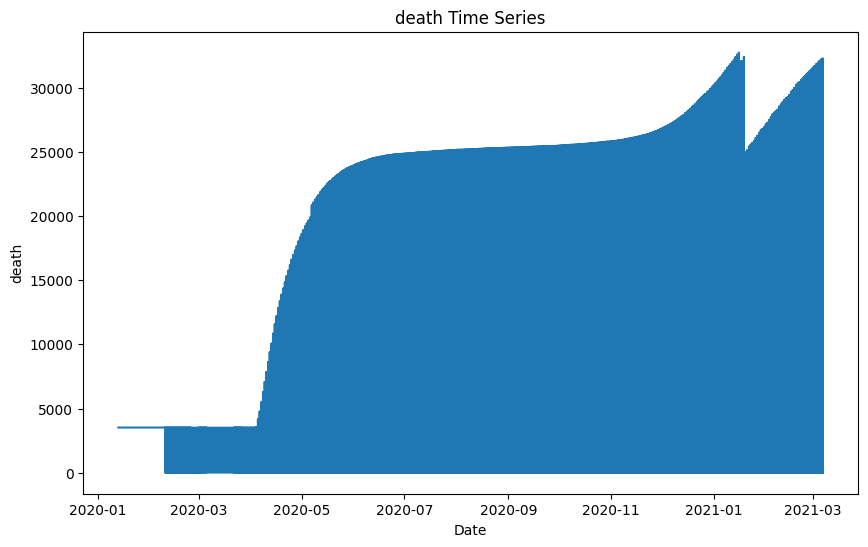

In [10]:
# Plot time-series charts for selected columns
for column in columns_of_interest:
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[column])
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} Time Series')
    plt.show()

In [11]:
# Check for stationarity using the Augmented Dickey-Fuller test
for column in columns_of_interest:
    result = adfuller(data[column])
    print(f'{column} - ADF Statistic: {result[0]}')
    print(f'{column} - p-value: {result[1]}')
    print(f'{column} - Critical Values: {result[4]}')

death - ADF Statistic: -6.962181513454376
death - p-value: 9.104808744788594e-10
death - Critical Values: {'1%': -3.4306444246992567, '5%': -2.861670126083386, '10%': -2.566839262434497}


<Figure size 1000x600 with 0 Axes>

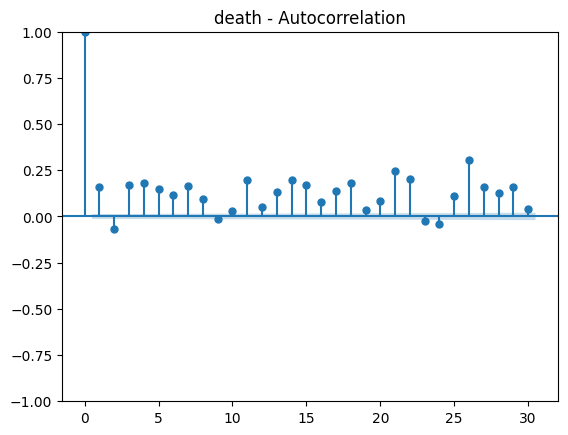

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

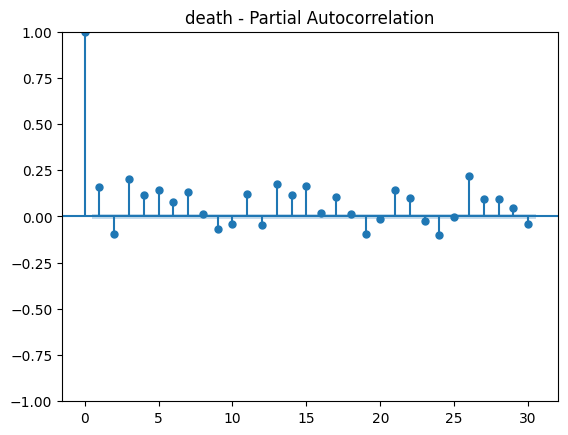

In [12]:
# Plot Autocorrelation and Partial Autocorrelation functions
for column in columns_of_interest:
    plt.figure(figsize=(10, 6))
    plot_acf(data[column], lags=30, title=f'{column} - Autocorrelation')
    plt.show()

    plt.figure(figsize=(10, 6))
    plot_pacf(data[column], lags=30, title=f'{column} - Partial Autocorrelation')
    plt.show()